In [2]:
# Menghubungkan Google Drive dan membaca file cleaned_data ke dalam DataFrame
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

file_path = '/content/drive/MyDrive/MSIB Batch 7/Hands on Assignment/MidTerm/cleaned_data.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


Rata-rata Waktu Pemesanan untuk Reservasi yang Dibatalkan: 101.51 days
Total Pembatalan Pemesanan: 44224
Rasio Pembatalan Pemesanan Dengan Rata-Rata Lead Time: 435.67


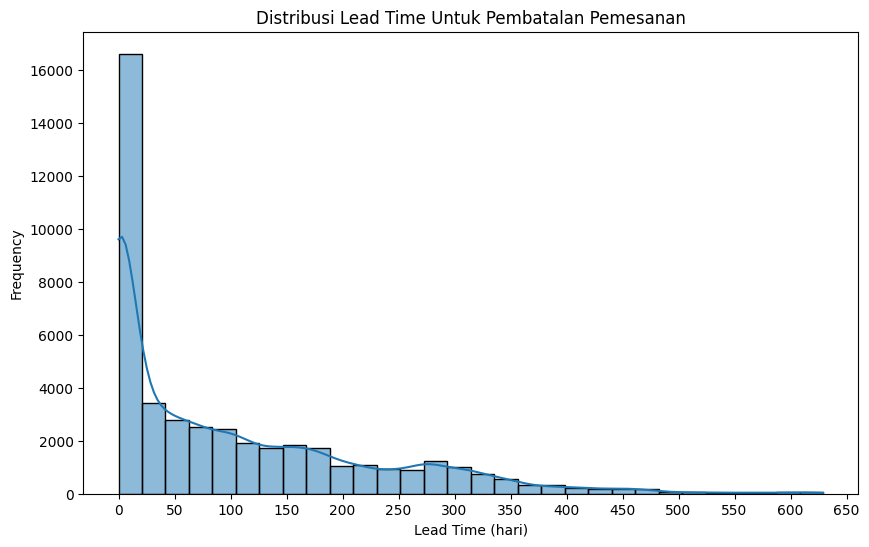

In [20]:
# Nomor 1
canceled_reservations = df[df['is_canceled'] == 1]

average_lead_time_canceled = canceled_reservations['lead_time'].mean()
total_canceled = canceled_reservations['lead_time'].count()

ratio = total_canceled / average_lead_time_canceled

print(f"Rata-rata Waktu Pemesanan untuk Reservasi yang Dibatalkan: {average_lead_time_canceled:.2f} days")
print(f"Total Pembatalan Pemesanan: {total_canceled}")
print(f"Rasio Pembatalan Pemesanan Dengan Rata-Rata Lead Time: {ratio:.2f}")

plt.figure(figsize=(10, 6))
sns.histplot(canceled_reservations['lead_time'], bins=30, kde=True)
plt.title('Distribusi Lead Time Untuk Pembatalan Pemesanan')
plt.xlabel('Lead Time (hari)')
plt.ylabel('Frequency')

plt.xticks(range(0, int(canceled_reservations['lead_time'].max()) + 50, 50))

plt.show()

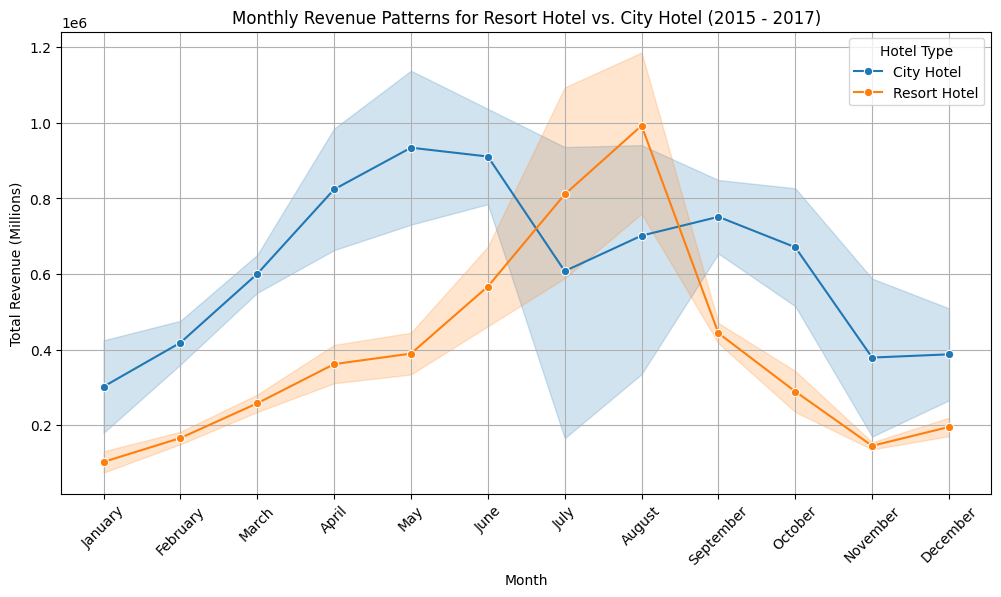

In [15]:
# Nomor 2
# Membuat kolom baru untuk total revenue per reservation
df['total_revenue'] = df['adr'] * (df['stays_in_weekend_nights'] + df['stays_in_week_nights'])

# Group by year, month, dan hotel untuk menghitung total revenue per bulan
monthly_revenue = df.groupby(['arrival_date_year', 'arrival_date_month', 'hotel'])['total_revenue'].sum().reset_index()

# Mengurutkan Bulan
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_revenue['arrival_date_month'] = pd.Categorical(monthly_revenue['arrival_date_month'], categories=month_order, ordered=True)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='arrival_date_month', y='total_revenue', hue='hotel', marker='o')
plt.title('Monthly Revenue Patterns for Resort Hotel vs. City Hotel (2015 - 2017)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Hotel Type')
plt.show()


Dari grafik ini dapat dilihat terdapat perbedaan pola pendapatan yang jelas antara hotel resort dan hotel kota di bulan-bulan tertentu. Hotel kota mencapai pendapatan tertingginya pada Mei-Juni (sekitar 900 ribu), sementara hotel resort justru memuncak di bulan Agustus (hampir 1 juta). Perbedaan paling kontras terlihat di awal tahun (Januari-April) dimana hotel kota memiliki pendapatan yang jauh lebih tinggi dibandingkan hotel resort. Namun situasi berbalik di bulan Agustus, dimana hotel resort mengalami lonjakan pendapatan signifikan sementara hotel kota justru mengalami penurunan. Di akhir tahun (November-Desember), kedua jenis hotel sama-sama mengalami penurunan pendapatan, namun hotel kota tetap mempertahankan pendapatan yang lebih tinggi dibandingkan hotel resort.

<ipython-input-13-66be29b4f951>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_countries, x='Country', y='Number of Cancellations', palette='viridis')


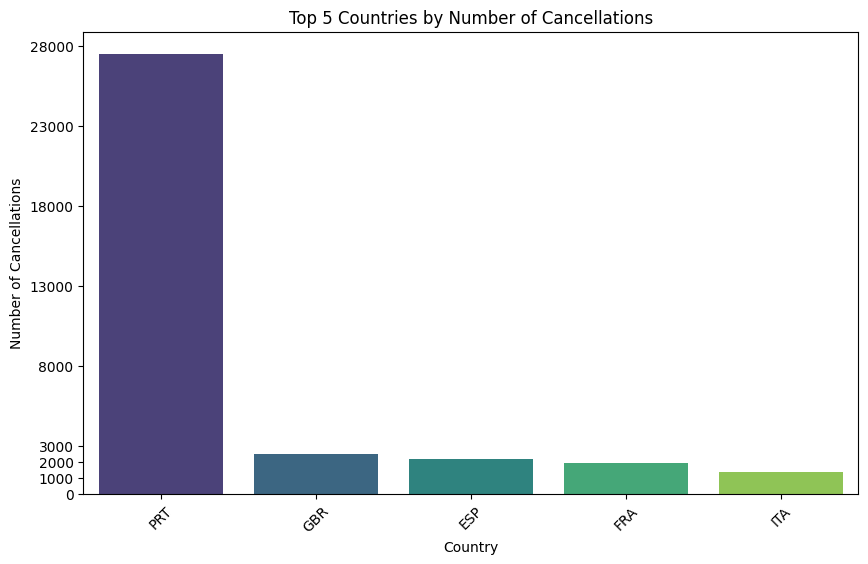

In [13]:
# Mengambil data pembatalan
canceled_reservations = df[df['is_canceled'] == 1]

# Mengelompokkan berdasarkan negara dan menghitung jumlah pembatalan
cancellation_by_country = canceled_reservations['country'].value_counts().reset_index()

# Menamai kolom agar lebih jelas
cancellation_by_country.columns = ['Country', 'Number of Cancellations']

# Mengambil 10 negara dengan jumlah pembatalan terbanyak
top_5_countries = cancellation_by_country.head(5)

# Mengatur ukuran grafik
plt.figure(figsize=(10, 6))

# Membuat bar chart
sns.barplot(data=top_5_countries, x='Country', y='Number of Cancellations', palette='viridis')

# Menambahkan judul dan label
plt.title('Top 5 Countries by Number of Cancellations')
plt.xlabel('Country')
plt.ylabel('Number of Cancellations')

# Memutar label di sumbu x untuk memudahkan pembacaan
plt.xticks(rotation=45)

max_value = top_5_countries['Number of Cancellations'].max()
yticks = list(range(0, 3000, 1000)) + list(range(3000, max_value + 5000, 5000))

# Mengatur rentang pada sumbu y
plt.yticks(yticks)

# Menampilkan grafik
plt.show()


Total Last-Minute Bookings: 40245
Total Last-Minute Cancellations: 13477
Cancellation Rate for Last-Minute Bookings: 33.49%


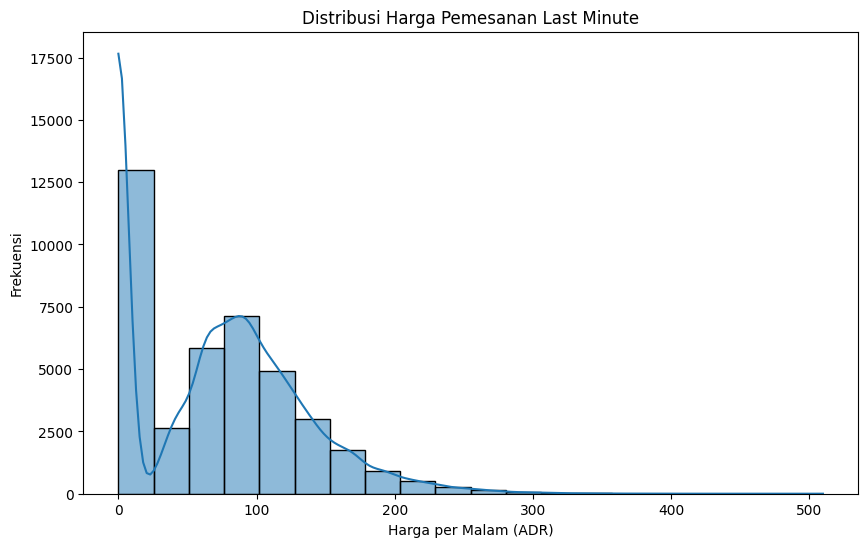

In [ ]:
# Nomor 4
# Tentukan threshold untuk pemesanan last minute
last_minute_threshold = 0  # dalam hari

# Filter untuk pemesanan last minute
last_minute_bookings = df[df['lead_time'] <= last_minute_threshold]

# Hitung total pemesanan last minute
total_last_minute_bookings = last_minute_bookings['lead_time'].count()

# Hitung total pembatalan pemesanan last minute
last_minute_cancellations = last_minute_bookings[last_minute_bookings['is_canceled'] == 1]
total_last_minute_cancellations = last_minute_cancellations['lead_time'].count()

# Hitung tingkat pembatalan pemesanan last minute
if total_last_minute_bookings > 0:
    cancellation_rate = (total_last_minute_cancellations / total_last_minute_bookings) * 100
else:
    cancellation_rate = 0

# Cetak hasil analisis
print(f"Total Last-Minute Bookings: {total_last_minute_bookings}")
print(f"Total Last-Minute Cancellations: {total_last_minute_cancellations}")
print(f"Cancellation Rate for Last-Minute Bookings: {cancellation_rate:.2f}%")

# Analisis karakteristik pemesanan last minute
plt.figure(figsize=(10, 6))
sns.histplot(last_minute_bookings['adr'], bins=20, kde=True)
plt.title('Distribusi Harga Pemesanan Last Minute')
plt.xlabel('Harga per Malam (ADR)')
plt.ylabel('Frekuensi')
plt.show()


In [ ]:
# Module 5
city_hotel_adr = df[df['hotel'] == 'City Hotel']['adr']
resort_hotel_adr = df[df['hotel'] == 'Resort Hotel']['adr']

# Perform an independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(city_hotel_adr, resort_hotel_adr, equal_var=False)

# Print the results
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

# Set significance level (alpha)
alpha = 0.05

# Decision based on the p-value
if p_value < alpha:
    print("Reject the null hypothesis (H0). There is a significant difference in ADR between City Hotel and Resort Hotel.")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant difference in ADR between City Hotel and Resort Hotel.")

T-statistic: 17.86
P-value: 0.0000
Reject the null hypothesis (H0). There is a significant difference in ADR between City Hotel and Resort Hotel.
